Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   linkedin_company_outsource  455 non-null    object 
 1   num_pred                    455 non-null    int64  
 2   num_true                    455 non-null    int64  
 3   hits                        455 non-null    int64  
 4   Precision@10                455 non-null    float64
 5   Recall@10                   455 non-null    float64
 6   F1@10                       455 non-null    float64
 7   MAP@10                      455 non-null    float64
 8   nDCG@10                     455 non-null    float64
 9   HitRate@10                  455 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 35.7+ KB
None

Mẫu dữ liệu:
                          linkedin_company_outsource  num_pred  num_true  \
0                http://linkedin.c

/tmp/ipykernel_3799704/1584862990.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


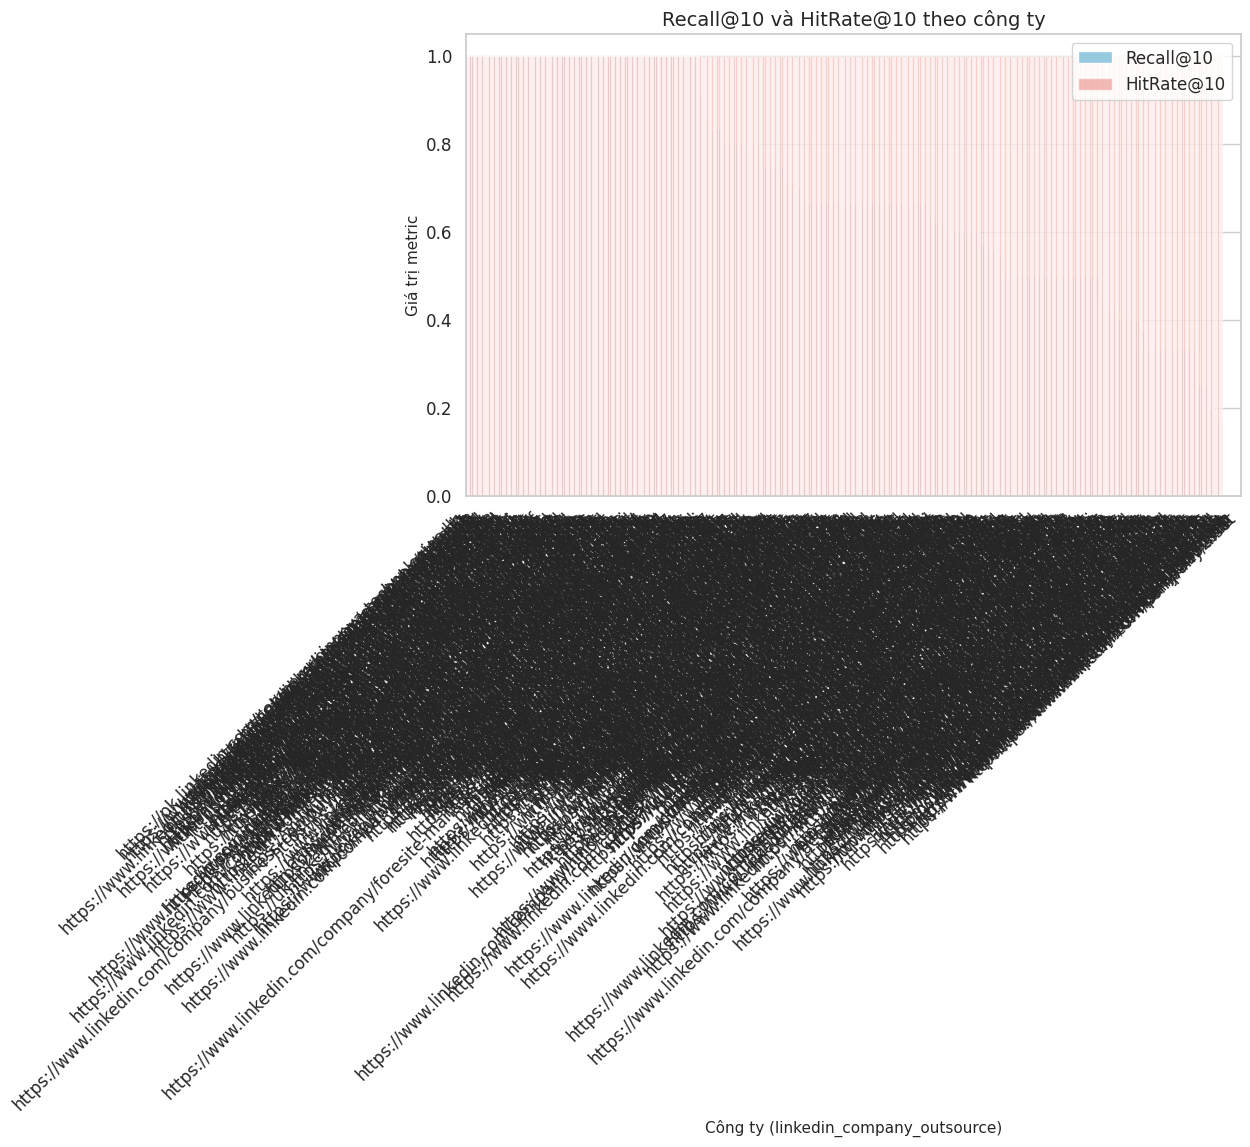

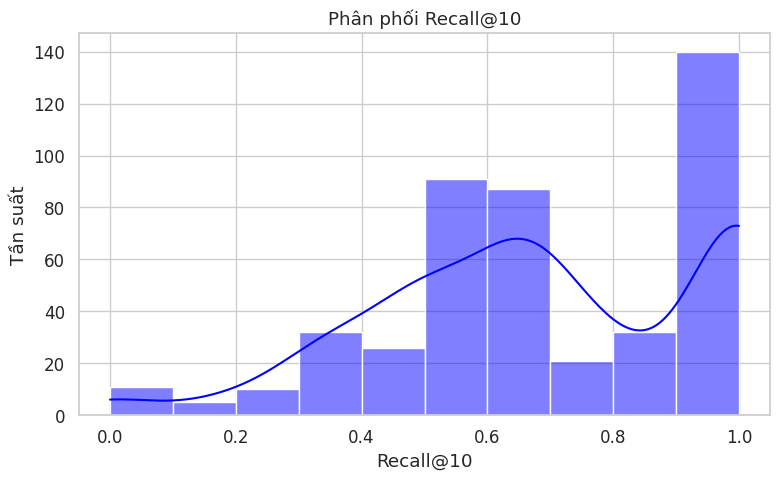

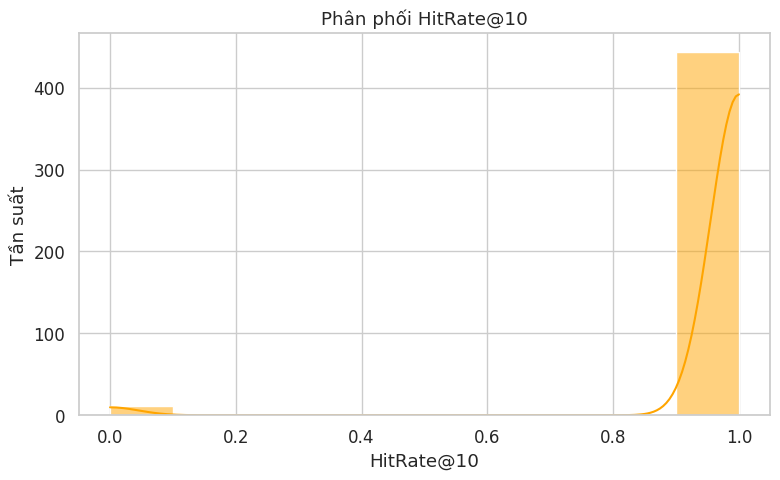

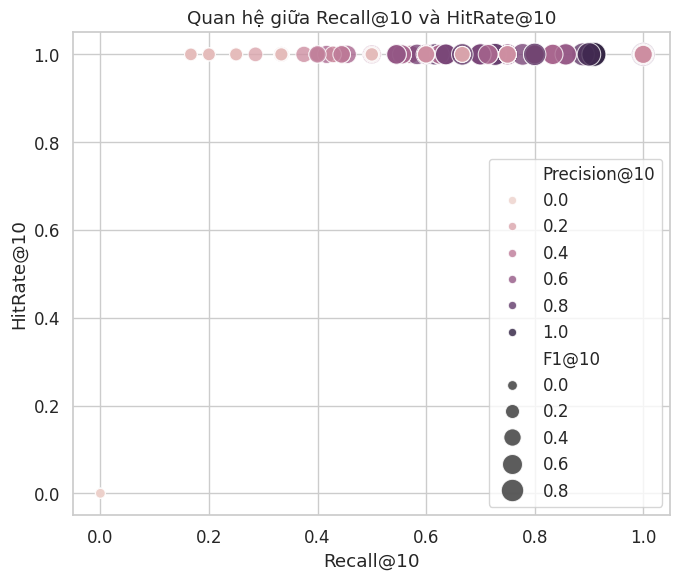


=== Thống kê cơ bản ===
        Recall@10  HitRate@10
count  455.000000  455.000000
mean     0.685987    0.975824
std      0.261723    0.153764
min      0.000000    0.000000
25%      0.500000    1.000000
50%      0.666667    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==== 1. Đọc dữ liệu ====
path = "/home/ubuntu/crawl/crawler-recommend-sys/data/benchmark/per_user_advanced_ensemble.csv"  # <-- thay bằng đường dẫn file thật
df = pd.read_csv(path)

# ==== 2. Kiểm tra dữ liệu ====
print("Thông tin dataset:")
print(df.info())
print("\nMẫu dữ liệu:")
print(df.head())

# ==== 3. Thiết lập style ====
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ==== 4. Biểu đồ 1: So sánh Recall@10 và HitRate@10 giữa các công ty ====
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values("Recall@10", ascending=False)
sns.barplot(x="linkedin_company_outsource", y="Recall@10", data=df_sorted, color="skyblue", label="Recall@10")
sns.barplot(x="linkedin_company_outsource", y="HitRate@10", data=df_sorted, color="salmon", alpha=0.6, label="HitRate@10")

plt.title("Recall@10 và HitRate@10 theo công ty", fontsize=14)
plt.xlabel("Công ty (linkedin_company_outsource)", fontsize=11)
plt.ylabel("Giá trị metric", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# ==== 5. Biểu đồ 2: Phân phối Recall@10 ====
plt.figure(figsize=(8, 5))
sns.histplot(df["Recall@10"], bins=10, kde=True, color="blue")
plt.title("Phân phối Recall@10")
plt.xlabel("Recall@10")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()

# ==== 6. Biểu đồ 3: Phân phối HitRate@10 ====
plt.figure(figsize=(8, 5))
sns.histplot(df["HitRate@10"], bins=10, kde=True, color="orange")
plt.title("Phân phối HitRate@10")
plt.xlabel("HitRate@10")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()

# ==== 7. Biểu đồ 4: Mối quan hệ giữa Recall@10 và HitRate@10 ====
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x="Recall@10", y="HitRate@10", hue="Precision@10", size="F1@10", sizes=(50, 300), alpha=0.8)
plt.title("Quan hệ giữa Recall@10 và HitRate@10")
plt.xlabel("Recall@10")
plt.ylabel("HitRate@10")
plt.legend()
plt.tight_layout()
plt.show()

# ==== 8. Nhận xét thống kê cơ bản ====
print("\n=== Thống kê cơ bản ===")
print(df[["Recall@10", "HitRate@10"]].describe())


In [16]:
import numpy as np
import pandas as pd
from typing import Dict, List
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
def _create_industry_hierarchy( industries: List[str]) -> Dict[str, Dict]:
    """
    Create hierarchical clustering of industries for better embeddings.
    """
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
        
    # Simple text-based clustering of industries
    industry_texts = [ind.lower().replace('&', 'and') for ind in industries]

    industry_embeddings = sentence_model.encode(industry_texts, convert_to_numpy=True)
    # Cluster industries into groups
    n_clusters = min(10, len(industries) // 3 + 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(industry_embeddings)
    
    hierarchy = {}
    for i, industry in enumerate(industries):
        hierarchy[industry] = {
            'cluster': int(clusters[i]),
            'embedding': industry_embeddings[i],
            'cluster_center': kmeans.cluster_centers_[clusters[i]]
        }
        
    return hierarchy

data = pd.read_csv('/home/ubuntu/crawl/crawler-recommend-sys/data/sample.csv')
data
columns = data['Industry'].dropna().unique().tolist()
industry_hierarchy = _create_industry_hierarchy(columns)    
print(columns)
print('---------------->')
for key, value in industry_hierarchy.items():
    print(value)

['Information technology', 'Software', 'Energy & natural resources', 'eCommerce', 'Consulting', 'Financial services', 'Non-profit', 'Nonprofit', 'Healthcare', 'Consumer Products', 'Hospitality & leisure', 'Manufacturing', 'IT Services', 'Insurance', 'Automotive', 'Arts, entertainment & music', 'Retail', 'Construction', 'Education', 'Business services', 'Gaming', 'Wellness & Fitness', 'Medical', 'Advertising & marketing', 'Real estate', 'Other Industry', 'Agriculture', 'Engineering', 'GPS, Navigation & GIS', 'Banks', 'Media', 'Human Resources', 'Other industries', 'Design', 'Utilities', 'Gambling', 'Transportation', 'Telecommunications', 'Consumer products & services', 'Logistics & Supply Chain', 'Sports', 'Social Networking', 'Publishing', 'Food & Beverages', 'Fitness', 'Legal', 'Government', 'Dental', 'Chemicals & Biotechnology', 'Cleaners', 'Food & Beverage', 'Environmental Services', 'Supply Chain, Logistics, and Transport', 'Home Services', 'Restaurants', 'Beauty & Cosmetics', 'Res